In [6]:
import numpy as np
from matplotlib import pyplot as plt

# Relative SNR Analysis

Assume that for a given comparison, the materials is the same
The spin echo signal equation is:  S = k ρ (1-exp(-TR/T1)) exp(-TE/T2)
If we assume that k and p are the same for a given tissue, and the TR and T1 is the same for each acqusition .... 
The only part of the spin echo equation that changes is exp[-TE/T2]
Therefore we will only assess how this ratio changes as a function of moment nulling TEs for  a given tissue

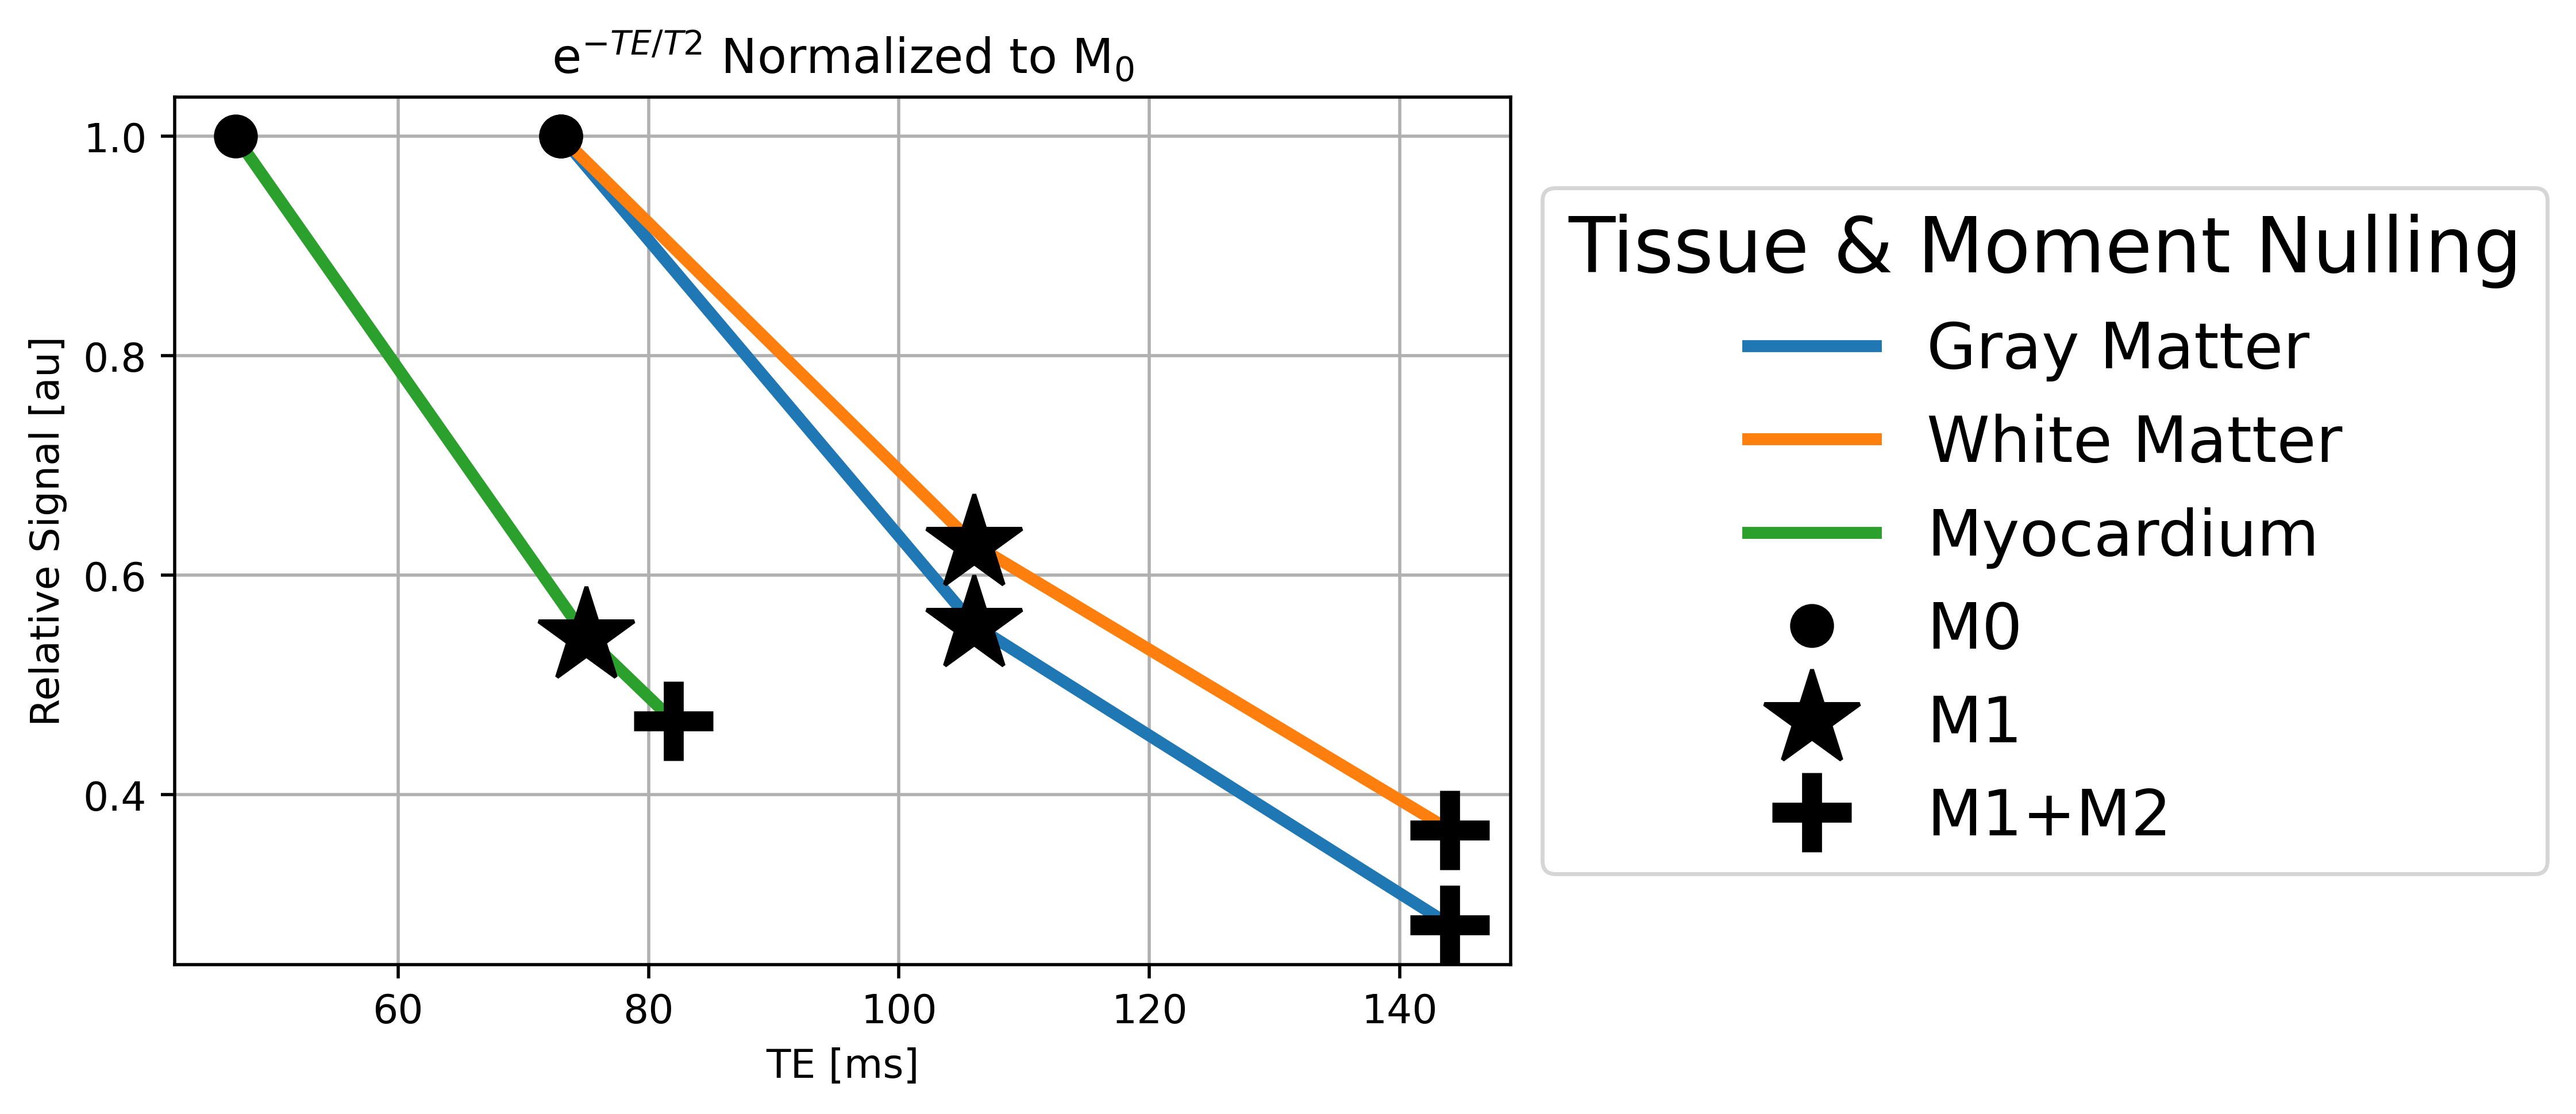

[1.         0.55472337 0.28143405]
[1.         0.62826782 0.36787944]
[1.         0.54406005 0.46725994]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

TE_Neuro = np.array([73, 106, 144]) # M0, M1, M2 respectively
TE_Cardiac = np.array([47, 75, 82]) # M0, M1, M2 respectively

T2 = [56, 71, 46] # Gray Matter, White Matter, Myocardium respectively
labels = ['Gray Matter', 'White Matter','Myocardium']
plt.figure(dpi = 500)
# Plot exp(-TE/T2) for each tissue as a ratio to the M0 case
plt.plot(TE_Neuro, np.exp(-TE_Neuro/T2[0])/np.exp(-TE_Neuro[0]/T2[0]), '-', linewidth=3, label=labels[0])
plt.plot(TE_Neuro, np.exp(-TE_Neuro/T2[1])/np.exp(-TE_Neuro[0]/T2[1]), '-', linewidth=3, label=labels[1])
plt.plot(TE_Cardiac, np.exp(-TE_Cardiac/T2[2])/np.exp(-TE_Cardiac[0]/T2[2]), '-', linewidth=3, label=labels[2])

plt.grid()
plt.title('e$^{-TE/T2}$ Normalized to M$_0$')
plt.xlabel('TE [ms]')
plt.ylabel('Relative Signal [au]')

# Increase font size for all labels
plt.rcParams.update({'font.size': 16})


# Customize markers for M0, M1, M2
markers = ['o', '*', '+']
legend_labels = ['M0', 'M1', 'M1+M2']
plt.plot(TE_Neuro[0], (np.exp(-TE_Neuro/T2[0])/np.exp(-TE_Neuro[0]/T2[0]))[0], markers[0],label=legend_labels[0],  color='black',markersize = '10')
plt.plot(TE_Neuro[0], (np.exp(-TE_Neuro/T2[1])/np.exp(-TE_Neuro[0]/T2[1]))[0], markers[0],  color='black',markersize = '10')
plt.plot(TE_Cardiac[0], (np.exp(-TE_Cardiac/T2[2])/np.exp(-TE_Cardiac[0]/T2[2]))[0], markers[0],  color='black',markersize = '10')



plt.plot(TE_Neuro[1], (np.exp(-TE_Neuro/T2[0])/np.exp(-TE_Neuro[0]/T2[0]))[1], markers[1], label=legend_labels[1],  color='black',markersize = '25')
plt.plot(TE_Neuro[1], (np.exp(-TE_Neuro/T2[1])/np.exp(-TE_Neuro[0]/T2[1]))[1], markers[1], color='black',markersize = '25')
plt.plot(TE_Cardiac[1], (np.exp(-TE_Cardiac/T2[2])/np.exp(-TE_Cardiac[0]/T2[2]))[1], markers[1], color='black',markersize = '25')

plt.plot(TE_Neuro[2], (np.exp(-TE_Neuro/T2[0])/np.exp(-TE_Neuro[0]/T2[0]))[2], markers[2], label=legend_labels[2], color='black',markersize = '20',markeredgewidth = 5)
plt.plot(TE_Neuro[2], (np.exp(-TE_Neuro/T2[1])/np.exp(-TE_Neuro[0]/T2[1]))[2], markers[2], color='black',markersize = '20',markeredgewidth = 5)
plt.plot(TE_Cardiac[2], (np.exp(-TE_Cardiac/T2[2])/np.exp(-TE_Cardiac[0]/T2[2]))[2], markers[2], color='black',markersize = '20',markeredgewidth = 5)

plt.legend( title='Tissue & Moment Nulling', title_fontsize='large', loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('T2_Analysis.png', bbox_inches='tight')
plt.show()


print(np.exp(-TE_Neuro/T2[0])/np.exp(-TE_Neuro[0]/T2[0]))
print(np.exp(-TE_Neuro/T2[1])/np.exp(-TE_Neuro[0]/T2[1]))
print(np.exp(-TE_Cardiac/T2[2])/np.exp(-TE_Cardiac[0]/T2[2]))


gm = np.exp(-TE_Neuro/T2[0])/np.exp(-TE_Neuro[0]/T2[0])
wm = np.exp(-TE_Neuro/T2[1])/np.exp(-TE_Neuro[0]/T2[1])
myo = np.exp(-TE_Cardiac/T2[2])/np.exp(-TE_Cardiac[0]/T2[2])

In [2]:
import numpy as np

def sinc_function(x):
    """
    Computes the value of abs(np.sinc((x) * 2 * 2 / 2)).
    
    Parameters:
        x (float): Value of x.
    
    Returns:
        float: Value of the function.
    """
    return np.abs(np.sinc((x) * 2 * 2 / 2))

def rk4_estimate_x(y, x_init, step_size=0.1, max_iterations=1000, tolerance=1e-6):
    """
    Estimates the value of x such that y = abs(np.sinc((x) * 2 * 2 / 2)) using RK4 method.
    
    Parameters:
        y (float): Value of y in the equation.
        x_init (float): Initial guess for the value of x.
        step_size (float): Step size for RK4 method.
        max_iterations (int): Maximum number of iterations.
        tolerance (float): Tolerance level for convergence.
    
    Returns:
        float: Estimated value of x.
    """
    x = x_init
    for _ in range(max_iterations):
        k1 = step_size * (y - sinc_function(x))
        k2 = step_size * (y - sinc_function(x + k1 / 2))
        k3 = step_size * (y - sinc_function(x + k2 / 2))
        k4 = step_size * (y - sinc_function(x + k3))
        
        x += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        
        if np.abs(y - sinc_function(x)) < tolerance:
            return x
    
    raise ValueError("RK4 method did not converge within max iterations.")

# Example usage:
all_phase = []
all_tissue = [gm,wm,myo]
for tissue in all_tissue:
    phase = []
    for y in tissue:
        x_init_guess = 0.0
        estimated_x = rk4_estimate_x(y, x_init_guess)
        print("For y =", y, ", the estimated value of x is approximately", estimated_x)
        phase.append(abs(estimated_x))
    
    all_phase.append(phase)



For y = 1.0 , the estimated value of x is approximately 0.0
For y = 0.5547233742387284 , the estimated value of x is approximately -0.281357519158805
For y = 0.28143404905232056 , the estimated value of x is approximately -0.3819749180608427
For y = 1.0 , the estimated value of x is approximately 0.0
For y = 0.6282678238084075 , the estimated value of x is approximately -0.25326955454281314
For y = 0.36787944117144233 , the estimated value of x is approximately -0.3500010215382859
For y = 1.0 , the estimated value of x is approximately 0.0
For y = 0.5440600500081386 , the estimated value of x is approximately -0.285346646407068
For y = 0.46725993731190485 , the estimated value of x is approximately -0.31369639869321997


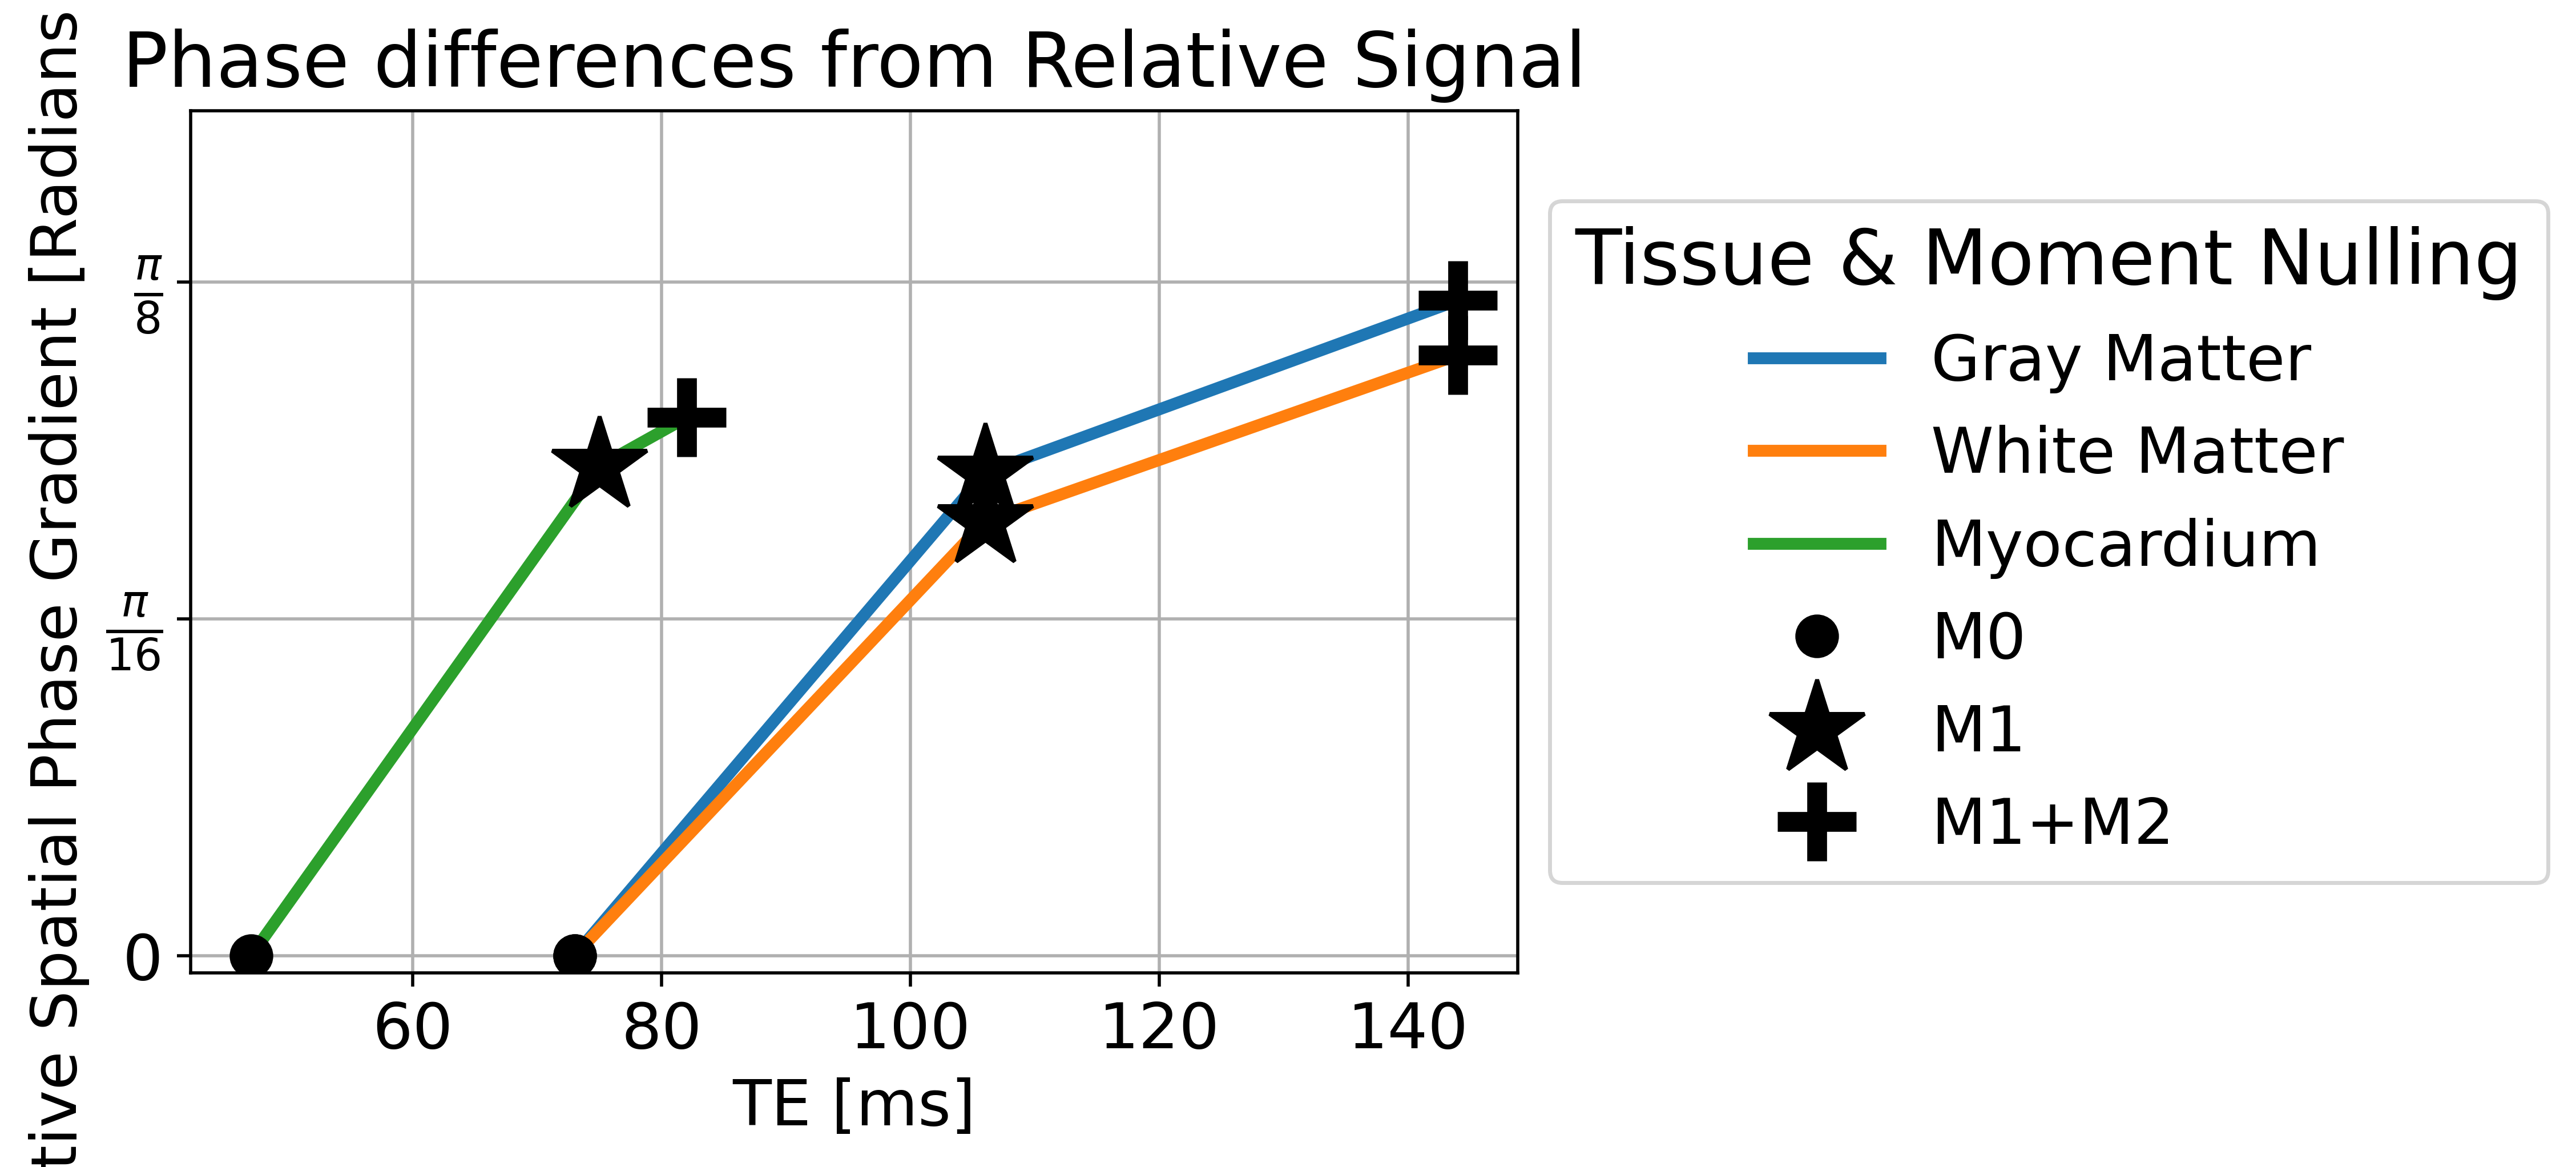

In [3]:
import numpy as np
import matplotlib.pyplot as plt

TE_Neuro = np.array([73, 106, 144]) # M0, M1, M2 respectively
TE_Cardiac = np.array([47, 75, 82]) # M0, M1, M2 respectively

T2 = [56, 71, 46] # Gray Matter, White Matter, Myocardium respectively
labels = ['Gray Matter', 'White Matter','Myocardium']
plt.figure(dpi = 500)
# Plot exp(-TE/T2) for each tissue as a ratio to the M0 case
plt.plot(TE_Neuro, all_phase[0], '-', linewidth=3, label=labels[0])
plt.plot(TE_Neuro, all_phase[1], '-', linewidth=3, label=labels[1])
plt.plot(TE_Cardiac, all_phase[2], '-', linewidth=3, label=labels[2])

plt.grid()
plt.title('Phase differences from Relative Signal')
plt.xlabel('TE [ms]')
plt.ylabel('Relative Spatial Phase Gradient [Radians / Pixel]')
# Set yticklabels at pi/16 and pi/8
plt.yticks([0, np.pi/16,np.pi/8], [0,r'$\frac{\pi}{16}$', r'$\frac{\pi}{8}$'])
plt.ylim([-0.010, np.pi/8+0.1])


# Increase font size for all labels
plt.rcParams.update({'font.size': 16})


# Customize markers for M0, M1, M2
markers = ['o', '*', '+']
legend_labels = ['M0', 'M1', 'M1+M2']
plt.plot(TE_Neuro[0], all_phase[0][0], markers[0],label=legend_labels[0],  color='black',markersize = '10')
plt.plot(TE_Neuro[0], all_phase[1][0], markers[0],  color='black',markersize = '10')
plt.plot(TE_Cardiac[0],all_phase[2][0], markers[0],  color='black',markersize = '10')



plt.plot(TE_Neuro[1], all_phase[0][1], markers[1], label=legend_labels[1],  color='black',markersize = '25')
plt.plot(TE_Neuro[1], all_phase[1][1], markers[1], color='black',markersize = '25')
plt.plot(TE_Cardiac[1],all_phase[2][1], markers[1], color='black',markersize = '25')

plt.plot(TE_Neuro[2], all_phase[0][2], markers[2], label=legend_labels[2], color='black',markersize = '20',markeredgewidth = 5)
plt.plot(TE_Neuro[2], all_phase[1][2], markers[2], color='black',markersize = '20',markeredgewidth = 5)
plt.plot(TE_Cardiac[2], all_phase[2][2], markers[2], color='black',markersize = '20',markeredgewidth = 5)

plt.legend( title='Tissue & Moment Nulling', title_fontsize='large', loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('Phase_Analysis.png', bbox_inches='tight')
plt.show()


In [4]:
all_phase

[[0.0, 0.281357519158805, 0.3819749180608427],
 [0.0, 0.25326955454281314, 0.3500010215382859],
 [0.0, 0.285346646407068, 0.31369639869321997]]

In [83]:
np.sinc(np.array(all_phase )* 2 * 2/ 2)

array([[1.        , 0.55472416, 0.28143484],
       [1.        , 0.62826881, 0.36788022],
       [1.        , 0.54406103, 0.46726071]])

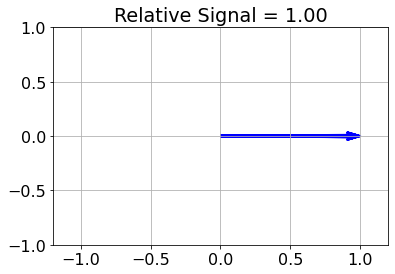

9.864585482614254
Phase Distribution = 0.02 radians, 1.08 degrees
Attenuation from phase distribution is: 0.9976765936156378


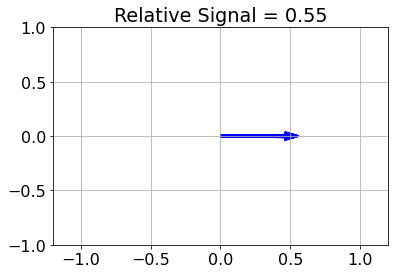

5.611759499630874
Phase Distribution = 0.03 radians, 2.00 degrees
Attenuation from phase distribution is: 0.9920353852844109


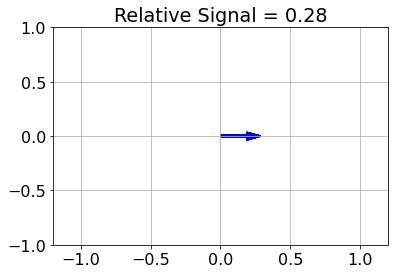

3.1790727211693084
Phase Distribution = 0.07 radians, 3.86 degrees
Attenuation from phase distribution is: 0.9704710848397033


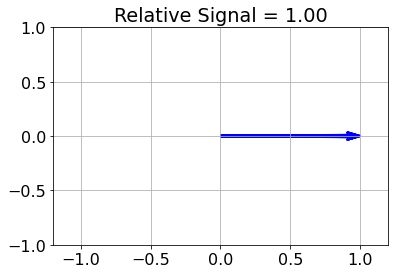

10.0475756539854
Phase Distribution = 0.02 radians, 1.09 degrees
Attenuation from phase distribution is: 0.9976148217882982


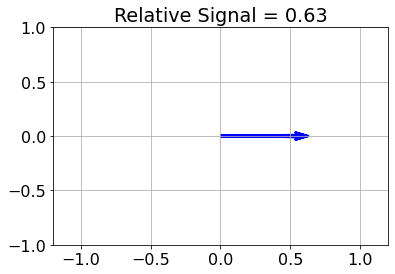

6.147539266489382
Phase Distribution = 0.03 radians, 1.87 degrees
Attenuation from phase distribution is: 0.9929703398205899


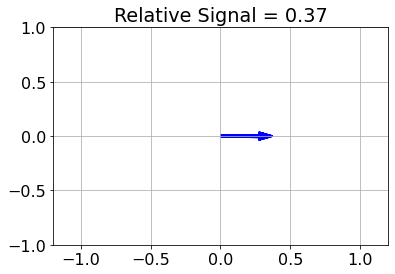

3.8017008349256924
Phase Distribution = 0.06 radians, 3.21 degrees
Attenuation from phase distribution is: 0.9795233416712454


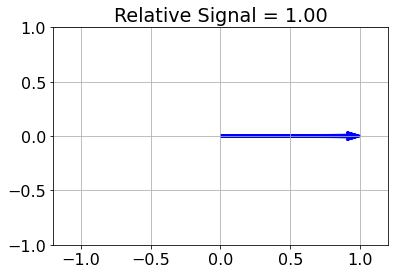

9.902258771016708
Phase Distribution = 0.02 radians, 1.13 degrees
Attenuation from phase distribution is: 0.997465058112626


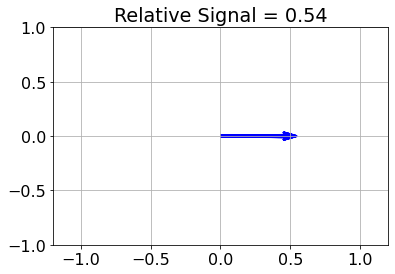

5.6372972516260935
Phase Distribution = 0.04 radians, 2.13 degrees
Attenuation from phase distribution is: 0.9909057230477352


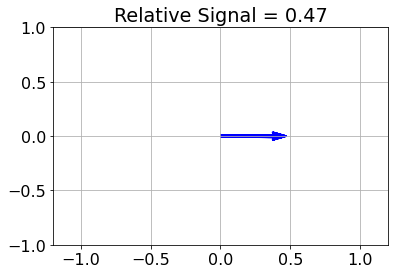

4.825745041020528
Phase Distribution = 0.04 radians, 2.53 degrees
Attenuation from phase distribution is: 0.9872136521127712


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set the mean and standard deviation of the normal distribution
mean = 0
std_dev = 0.1

# Simulate bulk displacement
displacement_angle = 0

# Set diffusion strength (adjust as needed)
diffusion_strength = 0.0

# Capture 8 to 20 and then 2 SNR values for cardiac 
# Connect first figure and then colors couple sanity checks to do what you think it should do 

tissue = [gm,wm,myo]
all_atten= []

for type in tissue:
    values = []
    for magnitude_amplitude in type:
        signal_all = []
        angles = []
        for _ in range(1000):
            # Generate complex random noise
            num = 1000
            real_part = np.random.normal(mean, std_dev, size=num)
            imaginary_part = np.random.normal(mean, std_dev, size=num)
            
            # Combine real and imaginary parts to create complex numbers
            complex_noise = real_part + 1j * imaginary_part
            
            # Define Magnitude and Phase with bulk displacement
            phase = np.zeros((num))
            signal_with_displacement = magnitude_amplitude * np.ones((num)) * np.exp(1j * (phase + displacement_angle)) + complex_noise 
            
            # Add diffusion noise
            #diffusion_noise = np.random.normal(mean, diffusion_strength, size=100)
            #signal_with_diffusion = signal_with_displacement + diffusion_noise
            signal = signal_with_displacement
            # Calculate magnitude and angle after displacement and diffusion
            final_magnitude = np.abs(np.sum(signal) / num)
            final_angle = np.angle(np.mean(np.exp(1j * np.angle(signal))))

            # Plot the magnitude vector after displacement and diffusion
            plt.quiver(0, 0, final_magnitude * np.cos(final_angle), final_magnitude * np.sin(final_angle),
                    angles='xy', scale_units='xy', scale=1, color='b', alpha=0.5)

            angles.append(final_angle)
            signal_all.append(signal)

        plt.title('Relative Signal = {:.2f}'.format(magnitude_amplitude))

        plt.xlim([-1.2, 1.2])
        plt.ylim([-1, 1])
        plt.grid(True)
        plt.show()
        print(abs(np.mean(abs(np.array(signal))))/np.std(abs(np.array(signal))))
        all_phase_angles = np.array(angles)
        difference = np.min(all_phase_angles)
        difference = np.max(all_phase_angles) - np.min(all_phase_angles)
        print('Phase Distribution = {:.2f} radians, {:.2f} degrees'.format(difference,np.degrees(difference)))

        print('Attenuation from phase distribution is:', (abs(np.sinc((difference) *2*2/2))))

        values.append((abs(np.sinc((difference) *2*2/2))))
    all_atten.append(values)


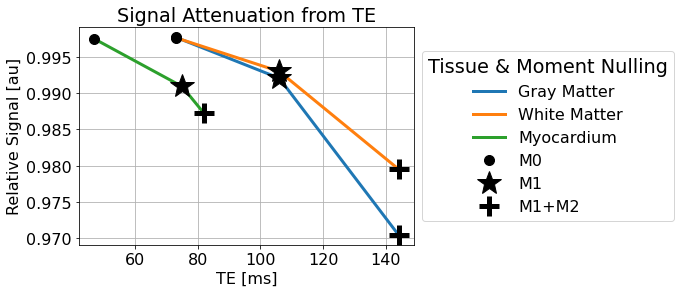

In [12]:
import numpy as np
import matplotlib.pyplot as plt


# Plot exp(-TE/T2) for each tissue as a ratio to the M0 case
plt.plot(TE_Neuro, all_atten[0], '-', linewidth=3, label=labels[0])
plt.plot(TE_Neuro, all_atten[1], '-', linewidth=3, label=labels[1])
plt.plot(TE_Cardiac, all_atten[2], '-', linewidth=3, label=labels[2])

plt.grid()
plt.title('Signal Attenuation from TE')
plt.xlabel('TE [ms]')
plt.ylabel('Phase Distribution [radians]')

# Increase font size for all labels
plt.rcParams.update({'font.size': 16})


# Customize markers for M0, M1, M2
markers = ['o', '*', '+']
legend_labels = ['M0', 'M1', 'M1+M2']
plt.plot(TE_Neuro[0], all_atten[0][0], markers[0],label=legend_labels[0],  color='black',markersize = '10')
plt.plot(TE_Neuro[0], all_atten[1][0], markers[0],  color='black',markersize = '10')
plt.plot(TE_Cardiac[0], all_atten[2][0], markers[0],  color='black',markersize = '10')



plt.plot(TE_Neuro[1], all_atten[0][1], markers[1],label=legend_labels[1],  color='black',markersize = '25')
plt.plot(TE_Neuro[1], all_atten[1][1], markers[1],  color='black',markersize = '25')
plt.plot(TE_Cardiac[1], all_atten[2][1], markers[1],  color='black',markersize = '25')

plt.plot(TE_Neuro[2],all_atten[0][2], markers[2], label=legend_labels[2], color='black',markersize = '20',markeredgewidth = 5)
plt.plot(TE_Neuro[2], all_atten[1][2], markers[2], color='black',markersize = '20',markeredgewidth = 5)
plt.plot(TE_Cardiac[2], all_atten[2][2], markers[2], color='black',markersize = '20',markeredgewidth = 5)

plt.legend( title='Tissue & Moment Nulling', title_fontsize='large', loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('T2_Analysis.png', bbox_inches='tight')
plt.show()


In [13]:
# Solve for what these phase differences are : 


# sinc in python = sin(pi x ) / pi x 

In [15]:
import numpy as np
from scipy.optimize import minimize_scalar

def find_x(y):
    """
    Finds the value of x such that y = abs(np.sinc((x) * 2 * 2 / 2)).
    
    Parameters:
        y (float): Value of y in the equation.
    
    Returns:
        float: Value of x that satisfies the equation.
    """
    # Define the objective function to minimize
    def objective_function(x):
        return np.abs(np.sinc((x) * 2 * 2 / 2)) - y
    
    # Use minimize_scalar to find the minimum (value of x)
    result = minimize_scalar(objective_function, bracket=[-10, 10])  # Adjust the bracket as needed based on the expected range of values for x
    return result.x

# Example usage:
y = 0.5
x_solution = find_x(y)
print("For y =", y, ", the solution for x is approximately", x_solution)


For y = 0.5 , the solution for x is approximately 10


In [25]:
abs(np.sinc((np.pi/16) *2*2/2))

0.7649499785212412

In [19]:
2*np.pi

6.283185307179586

In [ ]:
np.pi